In [3]:

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL
from matplotlib.patches import Rectangle

root_dir = "/home/libi/data"
bands_RGB = [43, 28, 10]

In [2]:
def visualize_hyperspectral_np(file_path, bands, save_path=None):
    """
    Visualize hyperspectral image from .np file using specific bands
    
    Args:
        file_path: Path to the .np file
        bands: List of band indices
               - If 3 bands: RGB composite
               - Otherwise: Separate plots for each band
        save_path: Optional path to save the visualization
    """
    # Load the hyperspectral data
    data = np.load(file_path)
    #reshape
    data = np.transpose(data, (1, 2, 0)) 
    

    print(f"Data shape: {data.shape}")
    print(f"Number of bands: {data.shape[2] if len(data.shape) == 3 else 1}")
    print(f"Data min: {data.min()}, max: {data.max()}")

    if isinstance(bands, int):
        bands = [bands]
    
    # Extract specified bands
    if len(data.shape) == 3 and data.shape[2] > max(bands):
        
        if len(bands) == 3:

            rgb_image = data[:, :, bands].astype(np.float32)
            

            rgb_normalized = np.zeros_like(rgb_image)
            for i in range(3):
                channel = rgb_image[:, :, i]
                ch_min, ch_max = channel.min(), channel.max()
                if ch_max > ch_min:
                    rgb_normalized[:, :, i] = (channel - ch_min) / (ch_max - ch_min)
                else:
                    rgb_normalized[:, :, i] = 0
            

            rgb_normalized = np.clip(rgb_normalized, 0, 1)
            print(rgb_normalized.size)
            # Create visualization
            plt.figure(figsize=(10, 8))
            plt.imshow(rgb_normalized)
            plt.title(f'RGB Composite (Bands {bands})')
            plt.axis('off')
            
            if save_path:
                plt.savefig(save_path, bbox_inches='tight', dpi=150)
                print(f"Image saved to {save_path}")
            
            plt.show()
            return rgb_normalized
            
        else:
            n_bands = len(bands)
            cols = min(3, n_bands)
            rows = (n_bands + cols - 1) // cols
            
            fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
            if n_bands == 1:
                axes = [axes]
            else:
                axes = axes.flatten() if n_bands > 1 else [axes]
            
            images = []
            for idx, band_idx in enumerate(bands):
                image = data[:, :, band_idx].astype(np.float32)
                img_min, img_max = image.min(), image.max()
                
                if img_max > img_min:
                    image_normalized = (image - img_min) / (img_max - img_min)
                else:
                    image_normalized = np.zeros_like(image)
                
                images.append(image_normalized)
                
                axes[idx].imshow(image_normalized, cmap='viridis')
                axes[idx].set_title(f'Band {band_idx}')
                axes[idx].axis('off')
            
            # Hide unused subplots
            for idx in range(n_bands, len(axes)):
                axes[idx].axis('off')
            
            plt.tight_layout()
            
            if save_path:
                plt.savefig(save_path, bbox_inches='tight', dpi=150)
                print(f"Image saved to {save_path}")
            
            plt.show()
            return images
        
    else:
        print("Error: Data shape doesn't match expected format or band indices out of range")
        return None



# Visualize single image
file_path = root_dir + 'ENMAP01-____L2A-DT0000005031_20221102T025947Z_032_V010110_20221116T234013Z/ENMAP01-____L2A-DT0000005031_20221102T025947Z_032_V010110_20221116T234013Z-Y02810408_X06890816/ENMAP01-____L2A-DT0000005031_20221102T025947Z_032_V010110_20221116T234013Z-Y02810408_X06890816-DATA.npy'
selected_bands = [10,40,28,201] 

visualize_hyperspectral_np(file_path, selected_bands, save_path='output.png')

FileNotFoundError: [Errno 2] No such file or directory: '/home/libi/dataENMAP01-____L2A-DT0000005031_20221102T025947Z_032_V010110_20221116T234013Z/ENMAP01-____L2A-DT0000005031_20221102T025947Z_032_V010110_20221116T234013Z-Y02810408_X06890816/ENMAP01-____L2A-DT0000005031_20221102T025947Z_032_V010110_20221116T234013Z-Y02810408_X06890816-DATA.npy'

Processing directory: /home/libi/data/patches/ENMAP01-____L2A-DT0000004950_20221103T162438Z_001_V010110_20221118T145147Z/ENMAP01-____L2A-DT0000004950_20221103T162438Z_001_V010110_20221118T145147Z-Y07860913_X09511078
Visualizing /home/libi/data/patches/ENMAP01-____L2A-DT0000004950_20221103T162438Z_001_V010110_20221118T145147Z/ENMAP01-____L2A-DT0000004950_20221103T162438Z_001_V010110_20221118T145147Z-Y07860913_X09511078/ENMAP01-____L2A-DT0000004950_20221103T162438Z_001_V010110_20221118T145147Z-Y07860913_X09511078-DATA.npy


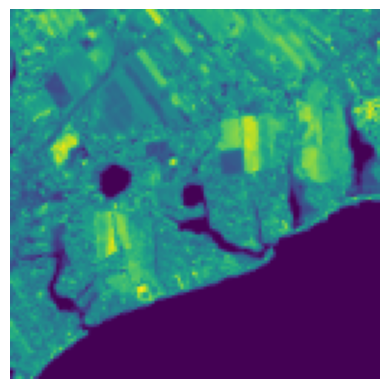

Preview image saved to ENMAP01-____L2A-DT0000004950_20221103T162438Z_001_V010110_20221118T145147Z-Y07860913_X09511078-DATA_band_100_normalized.png


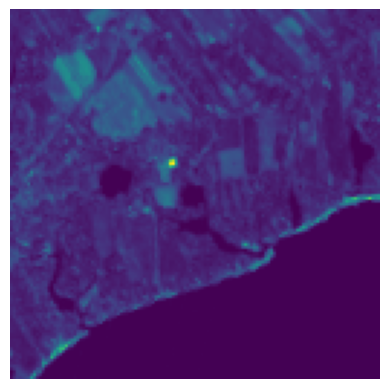

Preview image saved to ENMAP01-____L2A-DT0000004950_20221103T162438Z_001_V010110_20221118T145147Z-Y07860913_X09511078-DATA_band_150_normalized.png


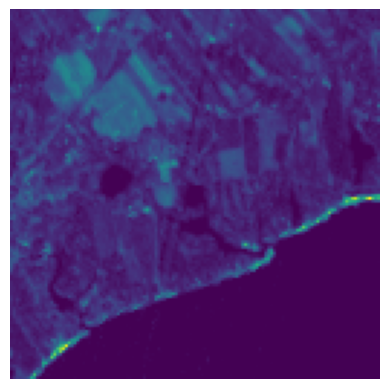

Preview image saved to ENMAP01-____L2A-DT0000004950_20221103T162438Z_001_V010110_20221118T145147Z-Y07860913_X09511078-DATA_band_200_normalized.png


In [ ]:
# /patches/ENMAP01-____L2A-DT0000004950_20221103T162438Z_001_V010110_20221118T145147Z/ENMAP01-____L2A-DT0000004950_20221103T162438Z_001_V010110_20221118T145147Z-Y07860913_X09511078
to_get = [
    "/patches/ENMAP01-____L2A-DT0000004950_20221103T162438Z_001_V010110_20221118T145147Z/ENMAP01-____L2A-DT0000004950_20221103T162438Z_001_V010110_20221118T145147Z-Y07860913_X09511078",
    # "/patches/ENMAP01-____L2A-DT0000004950_20221103T162438Z_001_V010110_20221118T145147Z/ENMAP01-____L2A-DT0000004950_20221103T162438Z_001_V010110_20221118T145147Z-Y09141041_X05670694",
    # "/patches/ENMAP01-____L2A-DT0000005022_20221104T152758Z_018_V010110_20221118T174025Z/ENMAP01-____L2A-DT0000005022_20221104T152758Z_018_V010110_20221118T174025Z-Y07730900_X07910918",
    # "/patches/ENMAP01-____L2A-DT0000005117_20221107T113507Z_002_V010110_20221119T095812Z/ENMAP01-____L2A-DT0000005117_20221107T113507Z_002_V010110_20221119T095812Z-Y05300657_X06730800",
    # "/patches/ENMAP01-____L2A-DT0000005122_20221107T162842Z_002_V010110_20221117T145318Z/ENMAP01-____L2A-DT0000005122_20221107T162842Z_002_V010110_20221117T145318Z-Y02820409_X08200947",
    # "/patches/ENMAP01-____L2A-DT0000005170_20221108T170449Z_004_V010110_20221119T080357Z/ENMAP01-____L2A-DT0000005170_20221108T170449Z_004_V010110_20221119T080357Z-Y04470574_X05350662",
    # "/patches/ENMAP01-____L2A-DT0000005031_20221102T025823Z_013_V010110_20221116T205052Z/ENMAP01-____L2A-DT0000005031_20221102T025823Z_013_V010110_20221116T205052Z-Y05410668_X01770304"
]
# a_index = 0
a_index_start = 0
a_index_end = 1

# patch_index = 0
patch_index_start = 0
patch_index_end = 10
aaaa = 0


def npy_to_rgb(npy_file, bands=None, normalize=True):
    if bands is None:
        bands = [43, 28, 10]  # Default bands
    data = np.load(npy_file)
    data = np.transpose(data, (1, 2, 0))
    rgb_image = data[:, :, bands].astype(np.float32)
    if not normalize:
        return rgb_image

    rgb_normalized = np.zeros_like(rgb_image)
    
    for i in range(3):
        channel = rgb_image[:, :, i]
        ch_min, ch_max = channel.min(), channel.max()
        if ch_max > ch_min:
            rgb_normalized[:, :, i] = (channel - ch_min) / (ch_max - ch_min)
        else:
            rgb_normalized[:, :, i] = 0
    return rgb_normalized


# for a_idx, a in enumerate(os.listdir(root_dir)):
#     # print(a)
#     # if a_index != a_idx:
#     #     continue 
#     if a_idx < a_index_start:
#         continue
#     if a_idx >= a_index_end:
#         raise SystemExit
#     for patch_idx, patch in enumerate(os.listdir(os.path.join(root_dir, a))):
#         # if patch_index != patch_idx:
#         #     continue
#         if patch_idx < patch_index_start:
#             continue
#         if patch_idx >= patch_index_end:
#             break
#         patch_path =  os.path.join(root_dir, a, patch)
        
#         # Find .npy and .jpg files
#         npy_file = None
#         jpg_file = None
#         for img in os.listdir(patch_path):
#             if img.endswith(".npy"):
#                 npy_file = os.path.join(patch_path, img)
#             if img.endswith(".jpg"):
#                 jpg_file = os.path.join(patch_path, img)
        
#         # Display both versions of the same image
#         if npy_file:
#             # Hyperspectral version
#             data = np.load(npy_file)
#             data = np.transpose(data, (1, 2, 0))
            
#             # Extract RGB bands
#             bands = [43, 28, 10]
#             rgb_image = data[:, :, bands].astype(np.float32)
            
#             # Normalize each channel
#             rgb_normalized = np.zeros_like(rgb_image)
#             for i in range(3):
#                 channel = rgb_image[:, :, i]
#                 ch_min, ch_max = channel.min(), channel.max()
#                 if ch_max > ch_min:
#                     rgb_normalized[:, :, i] = (channel - ch_min) / (ch_max - ch_min)
#                 else:
#                     rgb_normalized[:, :, i] = 0
            
#             # rgb_normalized = np.clip(rgb_normalized, 0, 1)
            
#             # Display
#             plt.imshow(rgb_normalized)
#             print(f"NPY Class: {a}, Patch: {patch}, Image: {os.path.basename(npy_file)} (Hyperspectral)")
#             print(f"Path: \n{npy_file}")
#             plt.axis("off")
#             # plt.title(f'NPY Bands {bands}')
#             plt.show()
#             # Save image too using PIL
#             pil_image = PIL.Image.fromarray((rgb_normalized * 255).astype(np.uint8))
#             pil_image.save(npy_file.replace('.npy', '_preview.png').split('/')[-1])
#             print(f"Preview image saved to {npy_file.replace('.npy', '_preview.png').split('/')[-1]}")

        
#         if jpg_file:
#             # True RGB version
#             image = tf.io.read_file(jpg_file)
#             image = tf.image.decode_jpeg(image, channels=3)
#             plt.imshow(image.numpy())
#             print(f"JPG Class: {a}, Patch: {patch}, Image: {os.path.basename(jpg_file)} (True RGB)")
#             plt.axis("off")
#             # plt.title("JPG True RGB")
#             plt.show()
        
#         aaaa += 1
#         if aaaa >= 10:
#             break
bands_to_export = [100, 150, 200]

for path in to_get:
    print(f"Processing directory: {root_dir + path}")
    for file in os.listdir(root_dir + path):
        if file.endswith('.npy'):
            file_path = root_dir + os.path.join(path, file)
            print(f"Visualizing {file_path}")
            img = npy_to_rgb(file_path, normalize=True)
            plt.imshow(img)
            plt.axis("off")
            plt.show()
            # Save image too using PIL
            pil_image = PIL.Image.fromarray((img * 255).astype(np.uint8))
            pil_image.save(file.replace('.npy', '_rgb_normalized.png'))
            print(
                f"Preview image saved to {file.replace('.npy', '_rgb_normalized.png')}")
            img = np.load(file_path)
            img = np.transpose(img, (1, 2, 0))
            for band in bands_to_export:
                plt.imshow(img[:, :, band])
                plt.axis("off")
                plt.show()
                # Save image too using PIL
                pil_image = PIL.Image.fromarray((img[:, :, band] / np.max(img[:, :, band]) * 255).astype(np.uint8))
                pil_image.save(file.replace('.npy', f'_band_{band}_normalized.png'))
                print(
                    f"Preview image saved to {file.replace('.npy', f'_band_{band}_normalized.png')}")
